In [1]:
import pandas as pd
import os
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
plt.style.use('seaborn')

In [2]:
os.chdir(os.path.dirname(os.getcwd()))
print(os.getcwd())


/home/congyu/congyu_program/pythons/inits/k_data_analysis_tools


In [3]:
PATH_TO_DB = "./datasets/power_usage"
PATH_TO_DATA_PU = os.path.join(PATH_TO_DB, "power_usage_2016_to_2020.csv")
PATH_TO_DATA_TH = os.path.join(PATH_TO_DB, "weather_2016_2020_daily.csv")

START_DATE = "StartDate"
DATE = "Date"
VALUE = "Value (kWh)"

CASES = "cases"
DAYS_AFTER = "days_after"
DATETIME = "datetime"
PERIOD_ID = "period_id"
PERIOD_ID_DAY = "period_id_day"


In [4]:
df_pu = pd.read_csv(PATH_TO_DATA_PU)
df_th = pd.read_csv(PATH_TO_DATA_TH)

df_pu[DATETIME] = df_pu[START_DATE].apply(lambda date_obj: datetime.strptime(str(date_obj), "%Y-%m-%d %H:%M:%S"))
df_pu[DATE] = df_pu[DATETIME].dt.strftime("%Y-%m-%d")

df_pu_date = df_pu.groupby(by=DATE)[VALUE].apply(sum)
df_pu_date = df_pu_date.reset_index()

df = df_pu_date.merge(df_th, on=DATE, how="inner")

df.head()

,Date,Value (kWh),Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
0,2016-01-06,29.691,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2
1,2016-01-07,43.177,1,94,84.9,76,76,74.0,72,94,71.6,51,13,5.7,0,29.9,29.9,29.8,0.00,3
2,2016-01-08,50.057,1,97,86.5,75,76,73.3,67,96,67.3,37,20,6.0,0,30.0,29.9,29.9,0.00,4
3,2016-01-09,47.363,1,96,86.2,78,75,73.3,70,88,67.1,46,13,6.3,0,29.8,29.8,29.7,0.01,5
4,2016-01-10,42.203,1,81,71.1,61,64,59.4,57,90,68.7,45,8,3.3,0,30.0,29.9,29.9,0.00,6


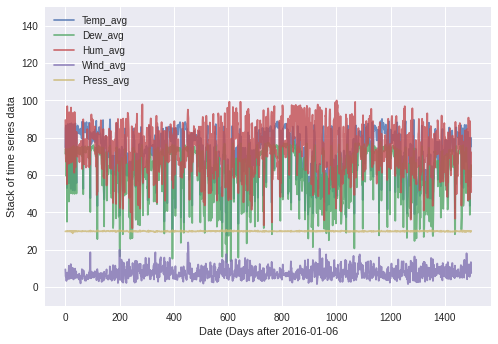

In [5]:
    feature_columns = [c for c in df.columns if c.endswith("_avg")]

    # plot multiple signals
    plt.figure()

    for f in feature_columns:
        plt.plot(df[f], label=f, alpha=0.8)

    plt.legend(loc='upper left')
    plt.ylim((-10, 150))
    plt.xlabel('Date (Days after 2016-01-06')
    plt.ylabel('Stack of time series data')
    plt.show()

In [6]:
    data = np.array(df[feature_columns].values)
    data = Normalizer().fit_transform(data)
    pca_transformer = PCA(n_components=1, random_state=0)
    principle_feature = pca_transformer.fit_transform(data)
    principle_feature = list(principle_feature.ravel())

In [10]:


def average_smooth(sig, level=100):
    new_sig = [np.mean(sig[max((i - level//2), 0):(i + level//2)]) for i in range(len(sig)-level//2)]
    return new_sig


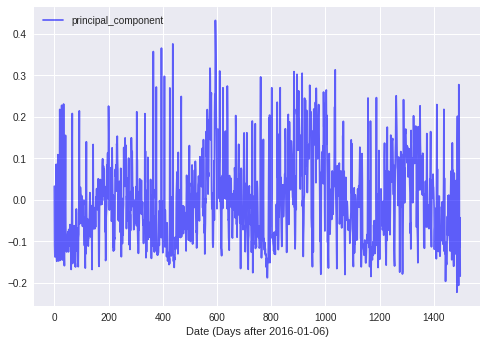

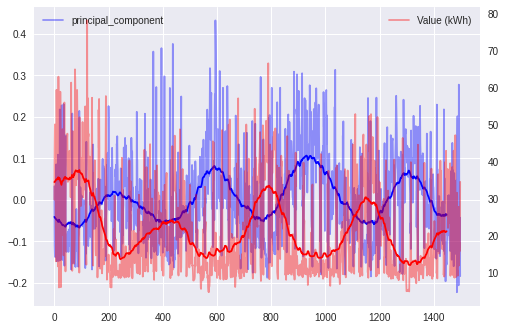

In [16]:
plt.plot(principle_feature, label="principal_component", alpha=0.6, color="b")
plt.legend(loc="upper left")
plt.xlabel('Date (Days after 2016-01-06)')
plt.show()

fig, ax1 = plt.subplots()

ax1.plot(principle_feature, label="principal_component", alpha=0.4, color="b")
ax1.plot(average_smooth(principle_feature), color="b")
plt.legend(loc="upper left")

ax2 = ax1.twinx()

ax2.plot(df[VALUE], label=VALUE, alpha=0.4, color="r")
ax2.plot(average_smooth(df[VALUE]), color="r")
plt.legend(loc="upper right")

plt.grid(None)
plt.xlabel('Date (Days after 2016-01-06)')
plt.show()


In [12]:
import matplotlib.colors as mplcolor

In [17]:
def barplot_colorbar(x, y, color, data):
    data_normalizer = mplcolor.Normalize()
    
    color_map = mplcolor.LinearSegmentedColormap.from_list("my_map", ["g", "r"])    
    """
    color_map = mplcolor.LinearSegmentedColormap(
        "my_map",
        segmentdata={'red': [(0.0, 0.0, 0.0),
                             (0.5, 1.0, 1.0),
                             (1.0, 1.0, 1.0)],

                     'green': [(0.0, 0.0, 0.0),
                               (0.25, 0.0, 0.0),
                               (0.75, 1.0, 1.0),
                               (1.0, 1.0, 1.0)],

                     'blue': [(0.0, 0.0, 0.0),
                              (0.5, 0.0, 0.0),
                              (1.0, 1.0, 1.0)]}
    )

    """
    
    x_value = data[x]
    y_value = data[y]
    c_value = data[color]

    plt.bar(list(range(len(x_value))),
            y_value,
            align="center",
            color=color_map(data_normalizer(c_value)))

    # plt.xticks(list(range(len(x_value))), x_value)
    plt.xlabel("Date (Days after 2016-01-06)")
    plt.ylabel("principal_component")
    plt.show()


In [18]:
PRINCIPLE_FEATURE = "principal_component"
df[PRINCIPLE_FEATURE] = principle_feature

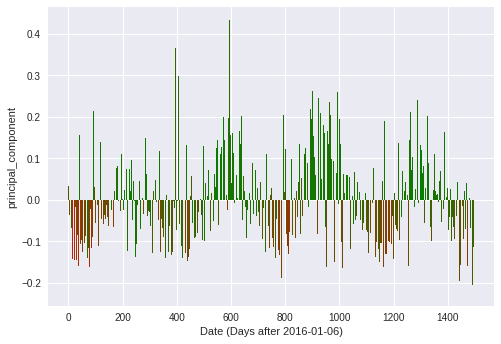

In [19]:
barplot_colorbar(DATE, PRINCIPLE_FEATURE, VALUE, df)